In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#training and testing of input
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Taking 1 image of training
x_train[0].shape

(28, 28)

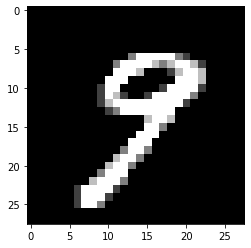

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[34743], cmap='gray')

In [6]:
x_train[0].shape


(28, 28)

In [7]:
#Activation function : softmax
#Loss function : sparse categorical cross entropy
#NN Architecture
#Input : Flatten
#Hidden : 500
#Output: 10

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam' , metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.6609 - accuracy: 0.9071
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3410 - accuracy: 0.9352
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.9419
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2744 - accuracy: 0.9451
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2301 - accuracy: 0.9507


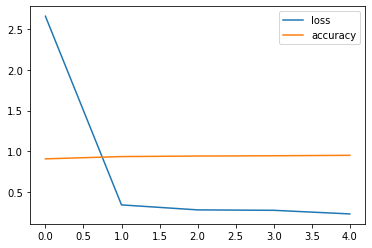

In [11]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [12]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[ 920,    0,    4,    1,    0,    4,    2,    0,    3,    2],
       [   0, 1108,    4,    3,    4,    0,    3,   11,    0,    7],
       [   2,    2,  985,    9,    4,    0,    3,   16,   11,    1],
       [   1,    3,    4,  958,    0,   31,    0,   12,    6,    8],
       [   0,    1,    2,    1,  931,    1,    5,   12,    8,   55],
       [   1,    2,    2,   12,    2,  818,    4,    3,   18,    8],
       [  18,    5,    6,    0,   14,   12,  935,    0,    8,    0],
       [   2,    0,    7,    3,    1,    0,    0,  952,    4,    8],
       [  22,   14,   16,   16,   11,   17,    5,    6,  914,   22],
       [  14,    0,    2,    7,   15,    9,    1,   16,    2,  898]])

In [15]:
accuracy_score(y_pred,y_test)

0.9419

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       936
           1       0.98      0.97      0.97      1140
           2       0.95      0.95      0.95      1033
           3       0.95      0.94      0.94      1023
           4       0.95      0.92      0.93      1016
           5       0.92      0.94      0.93       870
           6       0.98      0.94      0.96       998
           7       0.93      0.97      0.95       977
           8       0.94      0.88      0.91      1043
           9       0.89      0.93      0.91       964

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam' , metrics=['accuracy'])

In [19]:
from keras.callbacks import EarlyStopping
stops = EarlyStopping(monitor='val_loss' , mode = 'min' , patience=5 , verbose=1)
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test),callbacks=[stops])

Epoch 1/400
1875/1875 [==============================] - 9s 5ms/step - loss: 2.9368 - accuracy: 0.9073 - val_loss: 0.4039 - val_accuracy: 0.9246
Epoch 2/400
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3368 - accuracy: 0.9376 - val_loss: 0.3603 - val_accuracy: 0.9310
Epoch 3/400
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2958 - accuracy: 0.9410 - val_loss: 0.3720 - val_accuracy: 0.9341
Epoch 4/400
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2858 - accuracy: 0.9459 - val_loss: 0.3037 - val_accuracy: 0.9428
Epoch 5/400
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2398 - accuracy: 0.9518 - val_loss: 0.3058 - val_accuracy: 0.9483
Epoch 6/400
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2230 - accuracy: 0.9534 - val_loss: 0.3915 - val_accuracy: 0.9489
Epoch 7/400
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2206 - accuracy: 0.9570 - val_loss: 0.3849 - val_ac

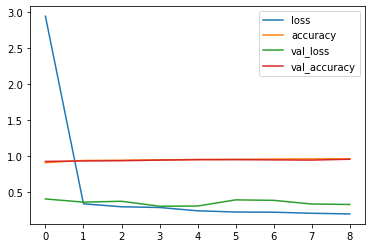

In [20]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [21]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
confusion_matrix(y_pred,y_test)


array([[ 957,    0,    1,    0,    2,    1,    4,    3,    2,    6],
       [   1, 1111,    0,    0,    4,    0,    3,    5,    2,    7],
       [   2,    7,  977,    8,    1,    0,    0,    8,    2,    0],
       [   0,    2,    5,  947,    0,   15,    0,    7,    7,    4],
       [   1,    0,    1,    0,  934,    0,    2,    2,    5,   17],
       [   2,    1,    1,   10,    0,  839,    8,    1,    6,    2],
       [   4,    3,    8,    0,    7,   11,  924,    0,    0,    1],
       [   1,    0,   14,    5,    1,    0,    0,  981,    3,    6],
       [  11,   11,   25,   36,    8,   22,   17,    4,  942,   32],
       [   1,    0,    0,    4,   25,    4,    0,   17,    5,  934]])

In [24]:
accuracy_score(y_pred,y_test)*100

95.46

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       976
           1       0.98      0.98      0.98      1133
           2       0.95      0.97      0.96      1005
           3       0.94      0.96      0.95       987
           4       0.95      0.97      0.96       962
           5       0.94      0.96      0.95       870
           6       0.96      0.96      0.96       958
           7       0.95      0.97      0.96      1011
           8       0.97      0.85      0.90      1108
           9       0.93      0.94      0.93       990

    accuracy                           0.95     10000
   macro avg       0.95      0.96      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [26]:
model.save("digit_Rec.hdf5")

In [27]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  